In [1]:
%load_ext autoreload
%autoreload 2
from APREdatabase import *
from APREmeasures import *
from PacketFeatureTree import *

In [2]:
ProtocolsDict = load_protocols(rel_to_root='../')
Protocol = 'USBMouse'

In [3]:
FormatsDF = load_formats(ProtocolsDict, Protocol, rel_to_root='../')
for capture_df in get_capture_csvs(Protocol, rel_to_root='../'):
    X, y_lengths, y_syntaxes, y_semantics = parse_df_to_X_y(capture_df, FormatsDF)
    break
X[0], y_lengths[0], y_syntaxes[0], y_semantics[0]

Getting capture csvs for USBMouse
../src/APREdatabase/Protocols/USBMouse/usb_data/usb_data.csv


((1669182856.139703, '0000010000000100'),
 [8, 8, 8, 8, 16, 16],
 ['UINT8', 'INT8', 'INT8', 'INT8', 'INT16', 'INT16'],
 ['Buttons', 'Vendor_1', 'Vendor_2', 'Scrolling', 'X_offset', 'Y_offset'])

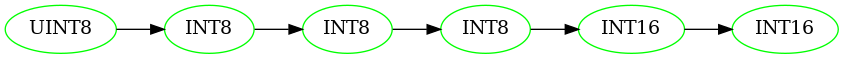

In [4]:
TFT = FieldTree(y_syntaxes)
TFT.display()

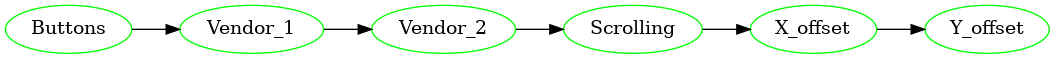

In [5]:
# Same can be done for semantics
FieldTree(y_semantics).display()

id


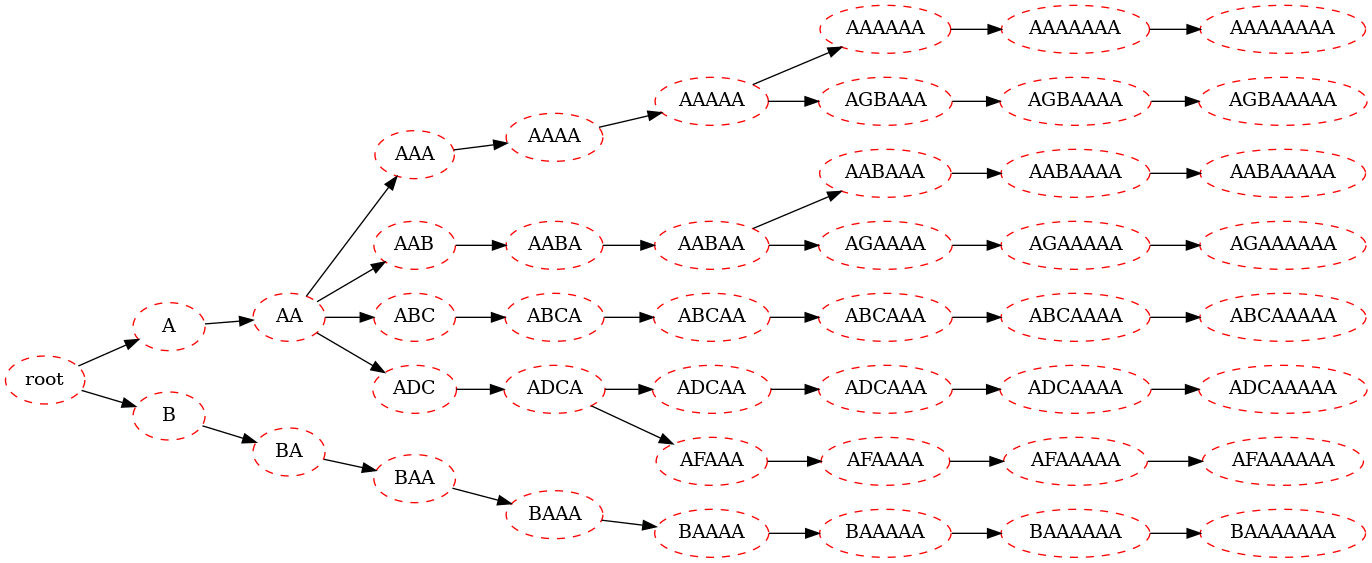

type


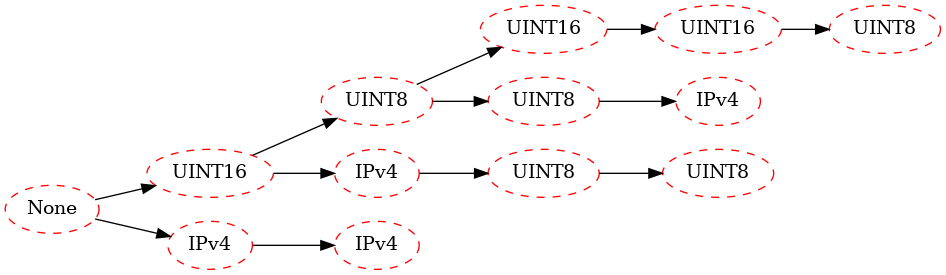

In [8]:
# load the byte-syntax-probability model
model_file = f'../src/PacketFeatureTree/ByteLabelModels/clf_ModBus.pkl'
pft1 = OneBytePFT(numeric_thresh=4, depth=10000)
pft1.fit(X[:1000])
pft1.show(attr='id')

pft2 = LabelledPFT(pft1, model_file)
pft2.fit()
pft2.show()